In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder(handle_unknown= 'use_encoded_value', unknown_value= -1)

from sklearn.model_selection import train_test_split as tts
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv("data.csv")
print(data.shape)
data.head(3)

(11608, 29)


,Facility ID,Facility Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,Emergency Services,Meets criteria for promoting interoperability of EHRs,Hospital overall rating,Hospital overall rating footnote,Mortality national comparison,Mortality national comparison footnote,Safety of care national comparison,Safety of care national comparison footnote,Readmission national comparison,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote,Year
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,2,NaN,Below the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,2020
1,10005,MARSHALL MEDICAL CENTERS,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,(256) 593-8310,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,2,NaN,Below the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Below the national average,NaN,2020
2,10006,NORTH ALABAMA MEDICAL CENTER,1701 VETERANS DRIVE,FLORENCE,AL,35630,LAUDERDALE,(256) 768-8400,Acute Care Hospitals,Proprietary,Yes,Y,2,NaN,Below the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Below the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Below the national average,NaN,2020


In [4]:
print(data['Facility ID'])

0         10001
1         10005
2         10006
3         10007
4         10011
          ...  
11603    670077
11604    670079
11605    670080
11606    670082
11607    670088
Name: Facility ID, Length: 11608, dtype: int64


In [3]:
data.columns

Index(['Facility ID', 'Facility Name', 'Address', 'City', 'State', 'ZIP Code',
       'County Name', 'Phone Number', 'Hospital Type', 'Hospital Ownership',
       'Emergency Services',
       'Meets criteria for promoting interoperability of EHRs',
       'Hospital overall rating', 'Hospital overall rating footnote',
       'Mortality national comparison',
       'Mortality national comparison footnote',
       'Safety of care national comparison',
       'Safety of care national comparison footnote',
       'Readmission national comparison',
       'Readmission national comparison footnote',
       'Patient experience national comparison',
       'Patient experience national comparison footnote',
       'Effectiveness of care national comparison',
       'Effectiveness of care national comparison footnote',
       'Timeliness of care national comparison',
       'Timeliness of care national comparison footnote',
       'Efficient use of medical imaging national comparison',
       'Ef

In [4]:
#Checking for null values
data.isnull().sum()

Facility ID                                                          0
Facility Name                                                        0
Address                                                              0
City                                                                 0
State                                                                0
ZIP Code                                                             0
County Name                                                          3
Phone Number                                                         0
Hospital Type                                                        0
Hospital Ownership                                                   0
Emergency Services                                                   0
Meets criteria for promoting interoperability of EHRs                0
Hospital overall rating                                              0
Hospital overall rating footnote                                 11601
Mortal

In [5]:
#Droping the columns whose null value percentage >70
data = data.drop(columns =['Hospital overall rating footnote',
                  'Mortality national comparison footnote',
                 'Safety of care national comparison footnote',
                 'Readmission national comparison footnote',
                 'Patient experience national comparison footnote',
                  'Effectiveness of care national comparison footnote','Timeliness of care national comparison footnote',
                 'Efficient use of medical imaging national comparison footnote'], axis = 1)
data.head(2)

,Facility ID,Facility Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,Emergency Services,Meets criteria for promoting interoperability of EHRs,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,Year
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,2,Below the national average,Same as the national average,Below the national average,Below the national average,Same as the national average,Same as the national average,Same as the national average,2020
1,10005,MARSHALL MEDICAL CENTERS,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,(256) 593-8310,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,2,Below the national average,Same as the national average,Above the national average,Same as the national average,Same as the national average,Above the national average,Below the national average,2020


In [6]:
# Replace County Name with mode value of County Name (By performing groupby on Address)
data['County Name'] = data.groupby(['Address'], sort = False)['County Name'].apply(lambda x : x.fillna(x.mode().iloc[0]))

In [7]:
#Checking for null values after null value treatment
data.isnull().sum()

Facility ID                                              0
Facility Name                                            0
Address                                                  0
City                                                     0
State                                                    0
ZIP Code                                                 0
County Name                                              0
Phone Number                                             0
Hospital Type                                            0
Hospital Ownership                                       0
Emergency Services                                       0
Meets criteria for promoting interoperability of EHRs    0
Hospital overall rating                                  0
Mortality national comparison                            0
Safety of care national comparison                       0
Readmission national comparison                          0
Patient experience national comparison                  

There are no-null values in above created ADS. We are good to go

In [8]:
ord_encode_columns = ['Mortality national comparison',
       'Safety of care national comparison', 'Readmission national comparison',
       'Patient experience national comparison',
       'Effectiveness of care national comparison',
       'Timeliness of care national comparison',
       'Efficient use of medical imaging national comparison']

mean_encode_columns = ['State', 'City']


In [9]:
data['Target'] = data['Hospital overall rating']
data['Target'] = data['Target']-1

In [10]:
for i in ord_encode_columns:
    data[i] = data[i].apply(lambda x: x.lower())
for i in mean_encode_columns:
    data[i] = data[i].apply(lambda x: x.lower())

### Converting Categorical Columns to Numerical Columns

In [11]:
# creating duplicate data
data_copy = data.copy()

In [12]:
from sklearn.model_selection import train_test_split
train, test =  train_test_split(data, test_size=0.33, random_state=42)

In [13]:
train.shape, test.shape

((7777, 22), (3831, 22))

In [14]:
# Applying mean encoding to few columns where it has many categories
for i in mean_encode_columns:
    # Mean Encoding
    mean = train.groupby(i)['Target'].mean().to_dict()
    train[i] = train[i].map(mean)
    test[i] = test[i].map(mean)
    
    test = test.fillna(-1)

def Encoding(data):
    
    # Nominal Encoding
    data['Hospital Type'] = np.where(data['Hospital Type'] == 'Critical Access Hospitals', 1, 0)
    data['Emergency Services'] = np.where(data['Emergency Services'] == 'Yes', 1, 0)
    data['Meets criteria for promoting interoperability of EHRs'] = np.where(data['Meets criteria for promoting interoperability of EHRs'] == 'Y', 1, 0)
 
    nom_enc = pd.get_dummies(data['Hospital Ownership'], drop_first=True, dtype=int)
    data = pd.concat([data.drop(['Hospital Ownership'], axis=1), nom_enc], axis=1)   
    data = data.reset_index()
    data = data.drop('index', axis = 1)
    
    return data

In [15]:
train = Encoding(train)

# Ordinal Encoding on train data
train = train.reset_index()
train = train.drop('index', axis = 1)
Encoding_data = train[ord_encode_columns]
enc.fit(Encoding_data)
Encoded_values = pd.DataFrame(enc.transform(Encoding_data), columns =ord_encode_columns)
train = train.drop(ord_encode_columns, axis=1)
train = pd.concat([train, Encoded_values], axis=1)
display(train.head(3))

test = Encoding(test)
# Ordinal Encoding on test data
test = test.reset_index()
test = test.drop('index', axis = 1)
Encoding_data_test = test[ord_encode_columns]
Encoded_values_test = pd.DataFrame(enc.transform(Encoding_data_test), columns =ord_encode_columns)
test = test.drop(ord_encode_columns, axis=1)
test = pd.concat([test, Encoded_values_test], axis=1)
display(test.head(3))


,Facility ID,Facility Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Emergency Services,Meets criteria for promoting interoperability of EHRs,Hospital overall rating,Year,Target,Government - Hospital District or Authority,Government - Local,Government - State,Physician,Proprietary,Voluntary non-profit - Church,Voluntary non-profit - Other,Voluntary non-profit - Private,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison
0,370026,ST MARY'S REGIONAL MEDICAL CENTER,305 SOUTH 5TH STREET,3.000000,1.892857,73701,GARFIELD,(580) 233-6100,0,1,1,4,2020,3,0,0,0,0,1,0,0,0,2.0,0.0,0.0,0.0,2.0,0.0,1.0
1,330180,SAMARITAN HOSPITAL,2215 BURDETT AVENUE,1.857143,1.251429,12180,RENSSELAER,(518) 427-3402,0,1,1,2,2020,1,0,0,0,0,0,0,0,1,2.0,2.0,2.0,1.0,2.0,1.0,2.0
2,340032,CAROMONT REGIONAL MEDICAL CENTER,2525 COURT DR,2.500000,2.023715,28052,GASTON,7048344891,0,1,1,4,2017,3,0,1,0,0,0,0,0,0,1.0,0.0,0.0,1.0,2.0,1.0,0.0


,Facility ID,Facility Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Emergency Services,Meets criteria for promoting interoperability of EHRs,Hospital overall rating,Year,Target,Government - Hospital District or Authority,Government - Local,Government - State,Physician,Proprietary,Voluntary non-profit - Church,Voluntary non-profit - Other,Voluntary non-profit - Private,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison
0,20024,CENTRAL PENINSULA GENERAL HOSPITAL,250 HOSPITAL PLACE,2.0,2.500000,99669,KENAI PENINSULA,(907) 262-4404,0,1,1,3,2019,2,0,0,0,0,0,0,1,0,2.0,1.0,0.0,2.0,2.0,1.0,2.0
1,370049,STILLWATER MEDICAL CENTER,1323 WEST 6TH STREET,3.2,1.892857,74076,PAYNE,4053721480,0,1,1,5,2018,4,0,0,0,0,0,0,1,0,2.0,2.0,0.0,0.0,2.0,0.0,2.0
2,310024,ROBERT WOOD JOHNSON UNIVERSITY HOSPITAL AT RAHWAY,865 STONE ST,1.0,1.682540,7065,UNION,(732) 381-4200,0,1,1,2,2019,1,0,0,0,0,0,0,0,1,1.0,0.0,1.0,1.0,2.0,1.0,2.0


In [16]:
train.shape, test.shape

((7777, 29), (3831, 29))

## Feature Importance For Random Forest

In [17]:
columns_consider = ['City','State','Hospital Type','Emergency Services',
             'Meets criteria for promoting interoperability of EHRs', 'Government - Hospital District or Authority',
             'Government - Local','Government - State','Physician','Proprietary','Voluntary non-profit - Church',
             'Voluntary non-profit - Other','Voluntary non-profit - Private','Mortality national comparison',
             'Safety of care national comparison','Readmission national comparison','Patient experience national comparison',
             'Effectiveness of care national comparison','Timeliness of care national comparison',
             'Efficient use of medical imaging national comparison']

X_train = train[columns_consider]
y_train = train[['Target']]
print(y_train['Target'].value_counts())

X_test = test[columns_consider]
y_test = test[['Target']]
print(y_test['Target'].value_counts())

2    2844
3    1979
1    1831
4     563
0     560
Name: Target, dtype: int64
2    1341
3    1023
1     915
4     279
0     273
Name: Target, dtype: int64


In [18]:
RF_fit = RandomForestClassifier()
RF_fit.fit(X_train,y_train)

Coef_ = pd.DataFrame(X_train.columns, RF_fit.feature_importances_).reset_index()
Coef_.columns  = ['Coef', 'Cols']
Coef_['Coef'] = round(Coef_.Coef*100, )
Coef_ = Coef_[['Cols', 'Coef']].sort_values('Coef', ascending = False)
Coef_['CumSum'] = round(Coef_.Coef.cumsum())
Coef_ = Coef_.reset_index().drop('index', axis = 1)
display(Coef_)





,Cols,Coef,CumSum
0,City,32.0,32.0
1,State,16.0,48.0
2,Readmission national comparison,9.0,57.0
3,Safety of care national comparison,9.0,66.0
4,Patient experience national comparison,8.0,74.0
5,Mortality national comparison,6.0,80.0
6,Timeliness of care national comparison,5.0,85.0
7,Efficient use of medical imaging national comp...,4.0,89.0
8,Voluntary non-profit - Private,2.0,91.0
9,Effectiveness of care national comparison,2.0,93.0


Consider top 14 variables which explains almost 97% of data

In [19]:
columns_required = ['City','State', 'Safety of care national comparison', 'Patient experience national comparison',
                    'Readmission national comparison','Mortality national comparison','Timeliness of care national comparison', 
                    'Efficient use of medical imaging national comparison','Voluntary non-profit - Private',
                    'Effectiveness of care national comparison','Proprietary','Voluntary non-profit - Other',
                     'Government - Local', 'Government - Hospital District or Authority'
                   ]
len(columns_required)

14

## Model Builing 


#### Decsion Tree

In [20]:
# Model building using DECISION TREE
dtc = DecisionTreeClassifier(random_state = 606)
dtc.fit(X_train[columns_required], y_train)
y_pred_dt= dtc.predict(X_test[columns_required])

#calculating Accuracy
print("Accuracy: \t",accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
print("Confusin Matrix: \n",confusion_matrix(y_test, y_pred_dt))

Accuracy: 	 0.6369094231271208
              precision    recall  f1-score   support

           0       0.44      0.54      0.48       273
           1       0.62      0.63      0.62       915
           2       0.68      0.69      0.69      1341
           3       0.69      0.62      0.65      1023
           4       0.55      0.54      0.55       279

    accuracy                           0.64      3831
   macro avg       0.60      0.61      0.60      3831
weighted avg       0.64      0.64      0.64      3831

Confusin Matrix: 
 [[147 117   8   1   0]
 [129 579 186  19   2]
 [ 37 208 929 154  13]
 [ 21  32 228 633 109]
 [  3   2  16 106 152]]


#### XG Boost

In [21]:
# Model building using XGBOOST
xgbc = xgb.XGBClassifier(random_state = 606)
xgbc.fit(X_train[columns_required], y_train)
y_pred_xg= xgbc.predict(X_test[columns_required])

#calculating Accuracy
print("Accuracy: \t",accuracy_score(y_test, y_pred_xg))
print(classification_report(y_test, y_pred_xg))
print("Confusin Matrix: \n",confusion_matrix(y_test, y_pred_xg))


Accuracy: 	 0.6674497520229705
              precision    recall  f1-score   support

           0       0.52      0.49      0.51       273
           1       0.65      0.67      0.66       915
           2       0.69      0.71      0.70      1341
           3       0.70      0.69      0.70      1023
           4       0.63      0.53      0.58       279

    accuracy                           0.67      3831
   macro avg       0.64      0.62      0.63      3831
weighted avg       0.67      0.67      0.67      3831

Confusin Matrix: 
 [[135 132   6   0   0]
 [ 91 609 207   8   0]
 [ 24 184 956 172   5]
 [ 10  13 210 708  82]
 [  0   3  10 117 149]]


#### Random Forest

In [22]:
# Model building using RANDOMFOREST
rfc = RandomForestClassifier(random_state = 606)
rfc.fit(X_train[columns_required], y_train)
y_pred= rfc.predict(X_test[columns_required])
print("Accuracy: \t",accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Confusin Matrix: \n",confusion_matrix(y_test, y_pred))

Accuracy: 	 0.6778908901070216
              precision    recall  f1-score   support

           0       0.64      0.49      0.56       273
           1       0.66      0.66      0.66       915
           2       0.68      0.75      0.72      1341
           3       0.70      0.70      0.70      1023
           4       0.66      0.49      0.56       279

    accuracy                           0.68      3831
   macro avg       0.67      0.62      0.64      3831
weighted avg       0.68      0.68      0.68      3831

Confusin Matrix: 
 [[ 135  126   11    1    0]
 [  74  608  224    9    0]
 [   3  171 1006  159    2]
 [   0   22  220  712   69]
 [   0    1   10  132  136]]


### RandomForest Classifier -  Hyperparameter Tuning

#### We are getting good accuracy from Randomforest Classifier and XgBoost Classifier..... Let's try to perform performing hyperparameter tuning to Randomforest Classifier


In [23]:
# Hyperparameter Tuning using RandomSearch CV
RFC = RandomForestClassifier()

param_grid = {
    'bootstrap': [True, False],
    'max_depth': [80, 90, 100, 110],
    'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 2000, num = 40)]}


rf_random = RandomizedSearchCV(estimator = RFC, param_distributions = param_grid, n_iter = 10, cv = 5, verbose=2, n_jobs = 1)

rf_random.fit(X_train[columns_required], y_train['Target'])

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .....bootstrap=True, max_depth=80, n_estimators=294; total time=   7.3s
[CV] END .....bootstrap=True, max_depth=80, n_estimators=294; total time=   7.6s
[CV] END .....bootstrap=True, max_depth=80, n_estimators=294; total time=   7.7s
[CV] END .....bootstrap=True, max_depth=80, n_estimators=294; total time=   7.7s
[CV] END .....bootstrap=True, max_depth=80, n_estimators=294; total time=   7.9s
[CV] END ....bootstrap=True, max_depth=90, n_estimators=1902; total time=  47.7s
[CV] END ....bootstrap=True, max_depth=90, n_estimators=1902; total time=  54.2s
[CV] END ....bootstrap=True, max_depth=90, n_estimators=1902; total time=  53.6s
[CV] END ....bootstrap=True, max_depth=90, n_estimators=1902; total time=  51.1s
[CV] END ....bootstrap=True, max_depth=90, n_estimators=1902; total time=  44.7s
[CV] END ....bootstrap=True, max_depth=110, n_estimators=879; total time=  22.1s
[CV] END ....bootstrap=True, max_depth=110, n_es

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [80, 90, 100, 110],
                                        'n_estimators': [100, 148, 197, 246,
                                                         294, 343, 392, 441,
                                                         489, 538, 587, 635,
                                                         684, 733, 782, 830,
                                                         879, 928, 976, 1025,
                                                         1074, 1123, 1171, 1220,
                                                         1269, 1317, 1366, 1415,
                                                         1464, 1512, ...]},
                   verbose=2)

In [24]:
# Buling model using best parameters obtained from hyperparameter tuning
best_params = rf_random.best_params_
print(best_params)

RFC = RandomForestClassifier(n_estimators =  1123,
                             max_depth = 100, bootstrap= True)
RFC.fit(X_train[columns_required], y_train)
y_pred_rf= RFC.predict(X_test[columns_required])


#calculating Accuracy
print("Accuracy: \t",accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Confusin Matrix: \n",confusion_matrix(y_test, y_pred_rf))


{'n_estimators': 830, 'max_depth': 90, 'bootstrap': True}
Accuracy: 	 0.6818063168885409
              precision    recall  f1-score   support

           0       0.64      0.49      0.55       273
           1       0.66      0.67      0.66       915
           2       0.69      0.75      0.72      1341
           3       0.70      0.71      0.71      1023
           4       0.66      0.49      0.57       279

    accuracy                           0.68      3831
   macro avg       0.67      0.62      0.64      3831
weighted avg       0.68      0.68      0.68      3831

Confusin Matrix: 
 [[ 133  131    8    1    0]
 [  74  612  220    9    0]
 [   1  168 1007  164    1]
 [   0   16  215  722   70]
 [   0    1   11  129  138]]


## Builing Machine Learining models which requires feature scaling


#### Normalizing Data

In [25]:
## Scaling the data before training KNN Model/Logestic regression
model = StandardScaler()
scaled = model.fit(X_train[columns_required])
train_Scaled = pd.DataFrame(scaled.transform(X_train[columns_required]), columns = columns_required)  

test_Scaled = pd.DataFrame(scaled.transform(X_test[columns_required]), columns = columns_required)   

#### Logestic Regression

In [26]:
# Model building using Logestic Regression
lrc = LogisticRegression()
lrc.fit(X_train[columns_required], y_train)
y_pred_lr= lrc.predict(X_test[columns_required])


#calculating Accuracy
print("Accuracy: \t",accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print("Confusin Matrix: \n",confusion_matrix(y_test, y_pred_lr))


Accuracy: 	 0.5116157661185069
              precision    recall  f1-score   support

           0       0.33      0.24      0.28       273
           1       0.50      0.46      0.48       915
           2       0.50      0.61      0.55      1341
           3       0.55      0.54      0.54      1023
           4       0.62      0.39      0.48       279

    accuracy                           0.51      3831
   macro avg       0.50      0.45      0.47      3831
weighted avg       0.51      0.51      0.51      3831

Confusin Matrix: 
 [[ 65 127  71  10   0]
 [ 71 420 379  45   0]
 [ 36 231 818 256   0]
 [ 19  52 336 548  68]
 [  4   5  30 131 109]]


#### K-Nearest Neighbour

In [27]:
# Model building using KNN Classifier
knc = KNeighborsClassifier( metric='minkowski')
knc.fit(X_train[columns_required], y_train)
y_pred= knc.predict(X_test[columns_required])
print("Accuracy: \t",accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Confusin Matrix: \n",confusion_matrix(y_test, y_pred))

Accuracy: 	 0.5954058992430175
              precision    recall  f1-score   support

           0       0.43      0.47      0.45       273
           1       0.58      0.59      0.59       915
           2       0.61      0.66      0.63      1341
           3       0.65      0.59      0.62      1023
           4       0.57      0.44      0.50       279

    accuracy                           0.60      3831
   macro avg       0.57      0.55      0.56      3831
weighted avg       0.60      0.60      0.59      3831

Confusin Matrix: 
 [[127 135  11   0   0]
 [116 543 247   9   0]
 [ 35 221 884 197   4]
 [ 12  32 288 604  87]
 [  3   2  27 124 123]]


### KNN Classifier -  Hyperparameter Tuning

#### We are getting good accuracy from KNN Classifier..... Let's try to perform performing hyperparameter tuning to KNN Classifier


Max accuracy at K = 1


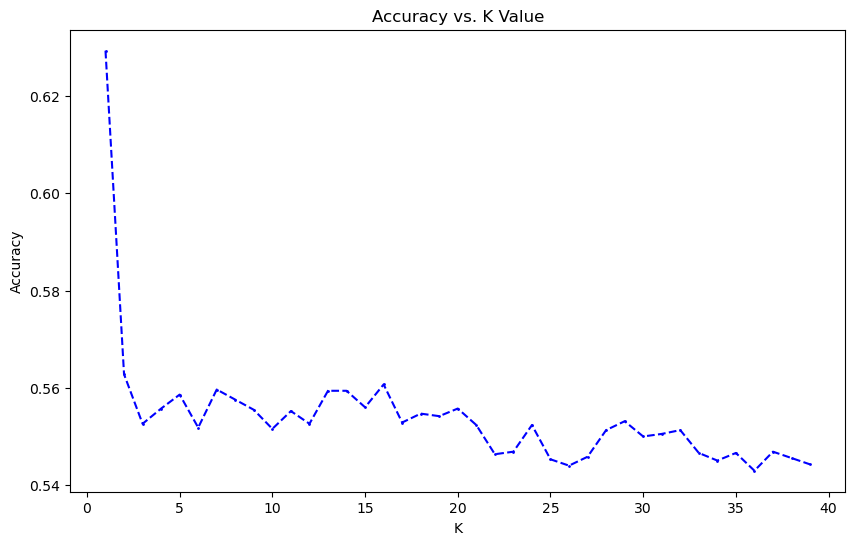

In [28]:
# Hyperparameter Tuning
Score = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i, metric='minkowski')
    knn.fit(train_Scaled, y_train['Target'])
    y_pred= knn.predict(test_Scaled)
    score_1=accuracy_score(y_test, y_pred)
    Score.append(score_1)

plt.figure(figsize=(10,6))
plt.plot(range(1,40),Score,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=1)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Max accuracy at K =",Score.index(max(Score))+1)
k = Score.index(max(Score))+1

In [29]:
# Buling model using best parameters obbtained from hyperparameter tuning
knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
knn.fit(X_train[columns_required], y_train)
y_pred_kn= knn.predict(X_test[columns_required])

#calculating Accuracy
print("Accuracy: \t",accuracy_score(y_test, y_pred_kn))
print(classification_report(y_test, y_pred_kn))
print("Confusin Matrix: \n",confusion_matrix(y_test, y_pred_kn))


Accuracy: 	 0.6434351344296528
              precision    recall  f1-score   support

           0       0.50      0.54      0.52       273
           1       0.62      0.65      0.64       915
           2       0.69      0.69      0.69      1341
           3       0.68      0.64      0.66      1023
           4       0.52      0.50      0.51       279

    accuracy                           0.64      3831
   macro avg       0.60      0.60      0.60      3831
weighted avg       0.64      0.64      0.64      3831

Confusin Matrix: 
 [[148 115   9   1   0]
 [120 594 185  16   0]
 [ 18 204 931 172  16]
 [  8  35 217 652 111]
 [  3   3  13 120 140]]


## After hyper parameter tuning best accuracy obtained from Randomforest